In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')
pipeline = Pipeline([('scaler', StandardScaler()),('lasso_logistic', logistic )])
param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5) 
grid_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

c:\Python311\cv\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best parameter (CV score=0.768):
{'lasso_logistic__C': 3.1622776601683795}


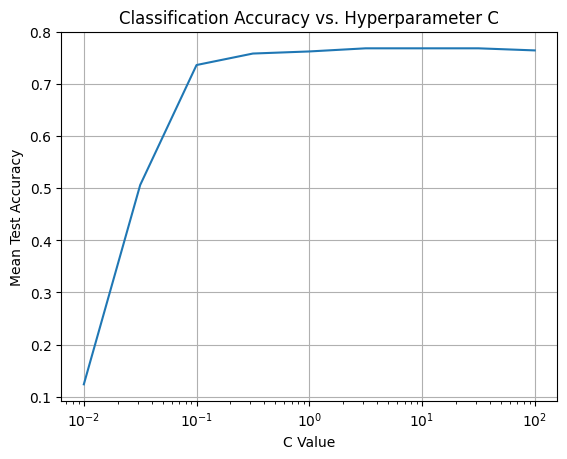

In [8]:
c_values = param_grid['lasso_logistic__C']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot classification accuracy vs. C
plt.semilogx(c_values, mean_test_scores)
plt.xlabel('C Value')
plt.ylabel('Mean Test Accuracy')
plt.title('Classification Accuracy vs. Hyperparameter C')
plt.grid()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = grid_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  1  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  1  1]
 [ 0  0  0  2  0  4  0  0  0  0]
 [ 0  0  0  0  0  2 10  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  1]
 [ 0  0  0  1  0  1  1  0  9  0]
 [ 0  1  0  0  0  0  0  1  0 12]]
Precision: 0.87
Recall: 0.86
F1-Score: 0.86
